# Stochastic Lotka-Volterra using Gillespie

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import log
from scipy.integrate import odeint

from ipywidgets import interact, FloatSlider, Button, VBox, HBox, Output
import ipywidgets as widgets

Lotka-Volterra is one of the most common modelling systems, often used to analyze the dynamics of biological systems. In its simplest form, namely the deterministic ODE one we have been introduced to in Advanced Mathematical Analysis 1 last year, it is defined by a system of ODEs which will also be described in the code below.

We will first briefly review the deterministic predator-prey model, which describes exponential prey growth limited by predation, and predator decline in the absence of prey:

In [4]:
# Store initial values for reset
INITIAL_VALUES = {
    'b': 0.5,    # prey birth rate
    'm': 0.5,    # predator death rate
    'r': 0.02,   # prey death rate per predator
    'a': 0.01,   # predator birth rate per prey
    'H0': 40,    # initial prey
    'P0': 9,     # initial predators
    't_max': 200 # time span
}

def lotka_volterra(state, t, b, m, r, a):
    """
    Lotka-Volterra equations
    P = Predators, H = Prey
    
    Parameters:
    b: Birth rate of prey
    m: Death rate of predators
    r: Death rate of prey per predator
    a: Birth rate of predators per prey
    """
    H, P = state
    dH_dt = b*H - r*H*P
    dP_dt = -m*P + a*H*P
    return [dH_dt, dP_dt]

def plot_lotka_volterra(b=0.5, m=0.5, r=0.02, a=0.01, H0=40, P0=9, t_max=200):
    """
    Plot the Lotka-Volterra system with given parameters
    """
    # Clear previous plot
    output.clear_output(wait=True)
    
    with output:
        # Time array
        t = np.linspace(0, t_max, 1000)
        
        # Initial conditions
        initial_state = [H0, P0]
        
        # Solve ODE
        solution = odeint(lotka_volterra, initial_state, t, args=(b, m, r, a))
        H = solution[:, 0]
        P = solution[:, 1]
        
        # Calculate equilibrium points
        # 1. Both extinct: (0, 0)
        # 2. Coexistence: (m/a, b/r)
        H_eq = m / a if a != 0 else 0
        P_eq = b / r if r != 0 else 0
        
        # Check for extinction (population drops below threshold)
        extinction_threshold = 0.1
        H_extinct = np.any(H < extinction_threshold)
        P_extinct = np.any(P < extinction_threshold)
        
        extinction_msg = ""
        if H_extinct and P_extinct:
            extinction_msg = "Both species go extinct!"
        elif H_extinct:
            extinction_msg = "Prey go extinct → Predators starve!"
        elif P_extinct:
            extinction_msg = "Predators go extinct → Prey explode!"
        
        # Create figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        
        # Time series plot
        ax1.plot(t, H, label='Prey (H)', color='blue', linewidth=2)
        ax1.plot(t, P, label='Predators (P)', color='red', linewidth=2)
        
        # Plot equilibrium lines on time series
        if a > 0 and m > 0:
            ax1.axhline(y=H_eq, color='blue', linestyle='--', alpha=0.5, label=f'Prey eq: {H_eq:.1f}')
        if r > 0 and b > 0:
            ax1.axhline(y=P_eq, color='red', linestyle='--', alpha=0.5, label=f'Pred eq: {P_eq:.1f}')
        
        ax1.set_xlabel('Time', fontsize=12)
        ax1.set_ylabel('Population', fontsize=12)
        
        # Add extinction message to title if applicable
        title = 'Population Dynamics Over Time'
        if extinction_msg:
            title += f'\n{extinction_msg}'
        ax1.set_title(title, fontsize=14)
        ax1.legend(fontsize=11)
        ax1.grid(True, alpha=0.3)
        ax1.set_ylim(bottom=0)
        
        # Phase space plot
        ax2.plot(H, P, color='green', linewidth=2)
        ax2.plot(H0, P0, 'ko', markersize=10, label=f'Initial ({H0:.0f}, {P0:.0f})')
        
        # Plot equilibrium point on phase space
        if a > 0 and m > 0 and r > 0 and b > 0:
            ax2.plot(H_eq, P_eq, 'ro', markersize=8, label=f'Equilibrium ({H_eq:.1f}, {P_eq:.1f})')
            # Add equilibrium lines
            ax2.axvline(x=H_eq, color='gray', linestyle=':', alpha=0.5)
            ax2.axhline(y=P_eq, color='gray', linestyle=':', alpha=0.5)
        
        ax2.set_xlabel('Prey (H)', fontsize=12)
        ax2.set_ylabel('Predators (P)', fontsize=12)
        ax2.set_title('Phase Space (Predator vs Prey)', fontsize=14)
        ax2.legend(fontsize=11)
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# Button callbacks
def only_prey_case(b):
    """Set parameters for only prey (no predators)"""
    m_slider.value = 1.0  # High predator death
    a_slider.value = 0.0  # No predator birth
    r_slider.value = 0.0  # No prey death from predators
    P0_slider.value = 0.0  # Start with no predators

def only_predators_case(b):
    """Set parameters for only predators (no prey)"""
    b_slider.value = 0.0  # No prey birth
    H0_slider.value = 0.0  # Start with no prey
    r_slider.value = 0.0  # No prey death from predators

def equilibrium_case(b):
    """Set parameters to show equilibrium dynamics"""
    # Classic equilibrium parameters
    b_slider.value = 0.5    # Prey birth rate
    m_slider.value = 0.5    # Predator death rate
    r_slider.value = 0.02   # Prey death rate per predator
    a_slider.value = 0.01   # Predator birth rate per prey
    
    # Start at equilibrium point
    H_eq = m_slider.value / a_slider.value
    P_eq = b_slider.value / r_slider.value
    
    H0_slider.value = H_eq
    P0_slider.value = P_eq

def reset_initial_numbers(b):
    """Reset ALL parameters to initial values"""
    b_slider.value = INITIAL_VALUES['b']
    m_slider.value = INITIAL_VALUES['m']
    r_slider.value = INITIAL_VALUES['r']
    a_slider.value = INITIAL_VALUES['a']
    H0_slider.value = INITIAL_VALUES['H0']
    P0_slider.value = INITIAL_VALUES['P0']
    t_max_slider.value = INITIAL_VALUES['t_max']

# Create sliders with continuous update using initial values
b_slider = FloatSlider(min=0.0, max=2.0, step=0.1, value=INITIAL_VALUES['b'], description='b (prey birth)', continuous_update=True)
m_slider = FloatSlider(min=0.0, max=2.0, step=0.1, value=INITIAL_VALUES['m'], description='m (pred death)', continuous_update=True)
r_slider = FloatSlider(min=0.0, max=0.1, step=0.005, value=INITIAL_VALUES['r'], description='r (prey death)', continuous_update=True)
a_slider = FloatSlider(min=0.0, max=0.1, step=0.005, value=INITIAL_VALUES['a'], description='a (pred birth)', continuous_update=True)
H0_slider = FloatSlider(min=0, max=100, step=5, value=INITIAL_VALUES['H0'], description='H0 (init prey)', continuous_update=True)
P0_slider = FloatSlider(min=0, max=100, step=2, value=INITIAL_VALUES['P0'], description='P0 (init pred)', continuous_update=True)
t_max_slider = FloatSlider(min=50, max=500, step=50, value=INITIAL_VALUES['t_max'], description='Time span', continuous_update=True)

# Create buttons
only_prey_btn = Button(description="Only Prey Case", button_style='info', tooltip='Set parameters for prey-only scenario')
only_predators_btn = Button(description="Only Predators Case", button_style='info', tooltip='Set parameters for predator-only scenario')
equilibrium_btn = Button(description="Equilibrium Case", button_style='success', tooltip='Set classic parameters with equilibrium start')
reset_all_btn = Button(description="Reset All Parameters", button_style='warning', tooltip='Reset ALL parameters to initial values')

# Link buttons to callbacks
only_prey_btn.on_click(only_prey_case)
only_predators_btn.on_click(only_predators_case)
equilibrium_btn.on_click(equilibrium_case)
reset_all_btn.on_click(reset_initial_numbers)

# Create output widget for immediate updates
output = Output()

# Arrange controls
left_column = VBox([b_slider, r_slider, H0_slider])
right_column = VBox([m_slider, a_slider, P0_slider])

# First button row - scenario buttons
scenario_button_row = HBox([only_prey_btn, equilibrium_btn, only_predators_btn], 
                          layout=widgets.Layout(justify_content='center', margin='5px 0'))

# Second button row - utility buttons
utility_button_row = HBox([reset_all_btn], 
                         layout=widgets.Layout(justify_content='center', margin='5px 0'))

# Combine all controls
top_row = HBox([left_column, right_column])
bottom_row = VBox([scenario_button_row, utility_button_row, t_max_slider], 
                 layout=widgets.Layout(align_items='center'))

# Combine layout
ui = VBox([top_row, bottom_row])

# Display UI
display(ui)

# Create interactive widget
out = widgets.interactive_output(plot_lotka_volterra, {
    'b': b_slider,
    'm': m_slider,
    'r': r_slider,
    'a': a_slider,
    'H0': H0_slider,
    'P0': P0_slider,
    't_max': t_max_slider
})

# Display output
display(output)

# Initial plot
plot_lotka_volterra()

Output()

Above, the two graphs represent the following: how the populations change over time (left) and the set of all possible physical states of the system (the phase space). We have also modelled the extreme cases (populations going extinct or prey exploding in number).

Running 50 Gillespie simulations...
  Run 10/50
  Run 20/50
  Run 30/50
  Run 40/50
  Run 50/50
Simulation complete!


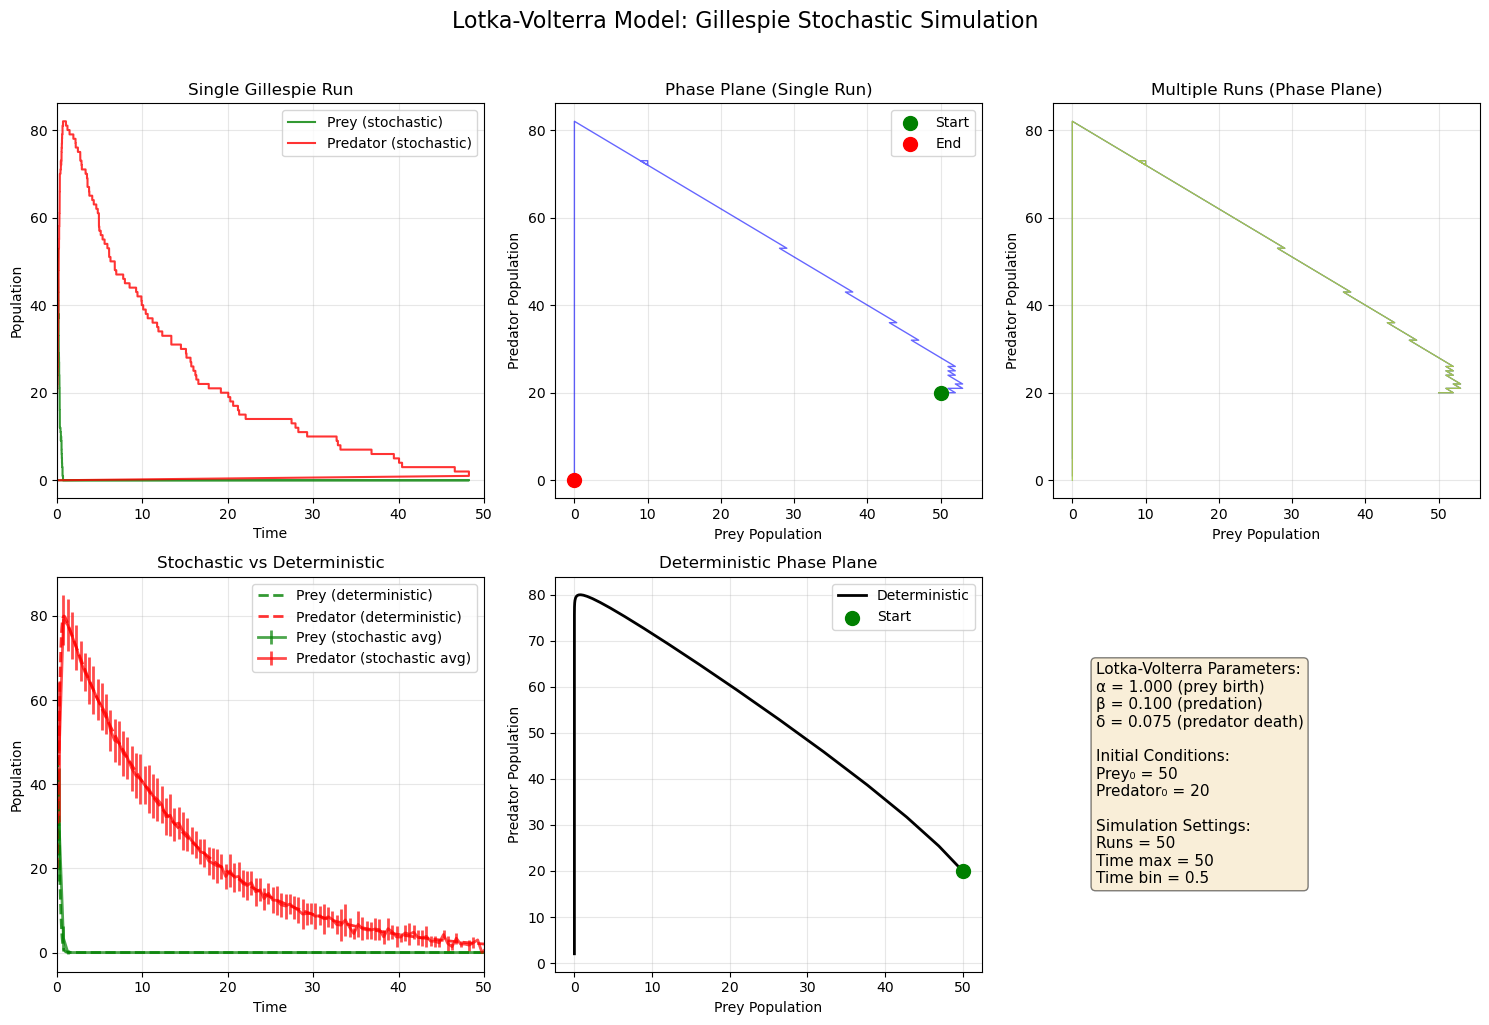


EXTINCTION ANALYSIS

Running 1000 simulations for extinction analysis...
  Completed 200/1000
  Completed 400/1000
  Completed 600/1000
  Completed 800/1000
  Completed 1000/1000

Extinction probabilities by time 100:
  Prey extinction: 1.000
  Predator extinction: 0.000
  Both extinct: 0.000
  Both survive: 0.000


In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from math import log
from scipy.integrate import odeint

# ======================
# LOTKA-VOLTERRA GILLESPIE SIMULATION
# ======================

# Parameters (typical values)
alpha = 1.0      # Prey birth rate
beta = 0.1       # Predation rate (prey death, predator birth)
delta = 0.075    # Predator death rate

# Simulation parameters
nRun = 50        # Number of independent iterations
timeMax = 50     # Max simulation time
eventMax = 10000 # Max events recorded in single run
seed = 42        # Random seed
timeBin = 0.5    # Time bin for statistics

# Number of reactions
nR = 4           # 3 reactions + 1 for total propensity

def propensities(x, y):
    """
    Calculate propensities for Lotka-Volterra reactions:
    1. Prey reproduction: X → X + 1 (rate alpha * X)
    2. Predation: X + Y → Y + Y (rate beta * X * Y)
    3. Predator death: Y → 0 (rate delta * Y)
    
    Returns: list of propensities [a0, a1, a2, a3]
    where a0 = total propensity, a1, a2, a3 = individual reaction rates
    """
    a = [0.0] * nR
    
    # Reaction 1: Prey reproduction
    a[1] = alpha * x
    
    # Reaction 2: Predation (prey eaten, predator reproduces)
    a[2] = beta * x * y
    
    # Reaction 3: Predator death
    a[3] = delta * y
    
    # Total propensity
    a[0] = sum(a[1:])
    
    return a

def applyReaction(react):
    """
    Apply reaction to change species counts
    Returns: (dx, dy) changes in prey and predator counts
    """
    dx = 0
    dy = 0
    
    if react == 1:        # Prey reproduction
        dx = 1
        dy = 0
    elif react == 2:      # Predation
        dx = -1
        dy = 1
    elif react == 3:      # Predator death
        dx = 0
        dy = -1
    else:
        raise ValueError("Invalid reaction type")
    
    return dx, dy

def randomReaction(a):
    """
    Select reaction based on propensities using linear search
    """
    # If total propensity is zero, system is dead
    if a[0] <= 0:
        return None
    
    # Generate random number
    r = a[0] * random.random()
    
    # Linear search for reaction
    cumulative = 0.0
    for i in range(1, nR):
        cumulative += a[i]
        if r < cumulative:
            return i
    
    # Fallback (should rarely happen due to floating point)
    return nR - 1

def lotka_volterra_ode(state, t, alpha, beta, delta):
    """
    Deterministic Lotka-Volterra ODEs for comparison
    """
    x, y = state
    dxdt = alpha * x - beta * x * y
    dydt = beta * x * y - delta * y
    return [dxdt, dydt]

# ======================
# MAIN SIMULATION
# ======================

# Initial conditions
x0 = 50  # Initial prey count
y0 = 20  # Initial predator count

# Set random seed
random.seed(seed)
np.random.seed(seed)

# Prepare for statistics
nTimeBin = int(timeMax / timeBin) + 1
x_av = np.zeros(nTimeBin)
x_sigma = np.zeros(nTimeBin)
x_sample = np.zeros(nTimeBin)
y_av = np.zeros(nTimeBin)
y_sigma = np.zeros(nTimeBin)
y_sample = np.zeros(nTimeBin)
z = np.zeros(nTimeBin)  # Counter for averaging

# Single run storage (for plotting individual trajectories)
time_sr = np.zeros(eventMax)
x_sr = np.zeros(eventMax)
y_sr = np.zeros(eventMax)
phase_x = []
phase_y = []

# Store all runs for statistics
all_runs_x = []
all_runs_y = []
all_runs_t = []

print(f"Running {nRun} Gillespie simulations...")

# Loop over independent runs
for iRun in range(nRun):
    if (iRun + 1) % 10 == 0:
        print(f"  Run {iRun + 1}/{nRun}")
    
    # Reset for each run
    x = x0
    y = y0
    time = 0.0
    iStep = 0
    
    # For single run (first run), record detailed trajectory
    record_single = (iRun == 0)
    
    if record_single:
        time_sr[iStep] = time
        x_sr[iStep] = x
        y_sr[iStep] = y
        phase_x.append(x)
        phase_y.append(y)
    
    # Gillespie loop
    while time < timeMax and iStep < eventMax - 1:
        # Calculate propensities
        a = propensities(x, y)
        
        # Check if system is dead (no reactions possible)
        if a[0] <= 0:
            # System extinct, break
            if record_single and 2*iStep+1 < eventMax:
                time_sr[2*iStep+1] = timeMax
                x_sr[2*iStep+1] = x
                y_sr[2*iStep+1] = y
            break
        
        # Draw time to next reaction
        tau = -log(random.random()) / a[0]
        
        # Draw reaction identity
        react = randomReaction(a)
        
        if react is None:
            break
        
        # Record state just before reaction (for single run)
        if record_single and 2*iStep+1 < eventMax:
            time_sr[2*iStep+1] = time + tau
            x_sr[2*iStep+1] = x
            y_sr[2*iStep+1] = y
        
        # Apply reaction
        dx, dy = applyReaction(react)
        x += dx
        y += dy
        
        # Update time
        time += tau
        iStep += 1
        
        # Record state after reaction (for single run)
        if record_single and 2*iStep < eventMax:
            time_sr[2*iStep] = time
            x_sr[2*iStep] = x
            y_sr[2*iStep] = y
            phase_x.append(x)
            phase_y.append(y)
        
        # Collect statistics
        iTime = int(time / timeBin)
        if iTime < nTimeBin:
            x_av[iTime] += x
            x_sigma[iTime] += x * x
            y_av[iTime] += y
            y_sigma[iTime] += y * y
            z[iTime] += 1
    
    # Store this run
    all_runs_x.append(x_sr[:iStep*2])
    all_runs_y.append(y_sr[:iStep*2])

print("Simulation complete!")

# Finalize statistics
for i in range(nTimeBin):
    if z[i] > 0:
        x_av[i] /= z[i]
        x_sigma[i] = np.sqrt(x_sigma[i] / z[i] - x_av[i] * x_av[i])
        y_av[i] /= z[i]
        y_sigma[i] = np.sqrt(y_sigma[i] / z[i] - y_av[i] * y_av[i])

# Trim single run arrays
valid_indices = time_sr <= timeMax
time_sr = time_sr[valid_indices]
x_sr = x_sr[valid_indices]
y_sr = y_sr[valid_indices]

# ======================
# DETERMINISTIC SOLUTION
# ======================

# Solve ODEs for comparison
t_ode = np.linspace(0, timeMax, 1000)
sol_ode = odeint(lotka_volterra_ode, [x0, y0], t_ode, args=(alpha, beta, delta))
x_ode = sol_ode[:, 0]
y_ode = sol_ode[:, 1]

# Time bins for plotting statistics
xLabels = np.arange(0.5*timeBin, timeMax+timeBin, timeBin)

# ======================
# VISUALIZATION
# ======================

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot 1: Single stochastic trajectory
ax1 = axes[0, 0]
ax1.plot(time_sr, x_sr, 'g-', label='Prey (stochastic)', alpha=0.8, linewidth=1.5)
ax1.plot(time_sr, y_sr, 'r-', label='Predator (stochastic)', alpha=0.8, linewidth=1.5)
ax1.set_xlabel('Time')
ax1.set_ylabel('Population')
ax1.set_title('Single Gillespie Run')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, timeMax)

# Plot 2: Phase plane (single run)
ax2 = axes[0, 1]
ax2.plot(x_sr, y_sr, 'b-', alpha=0.6, linewidth=1)
ax2.scatter(x_sr[0], y_sr[0], color='green', s=100, label='Start', zorder=5)
ax2.scatter(x_sr[-1], y_sr[-1], color='red', s=100, label='End', zorder=5)
ax2.set_xlabel('Prey Population')
ax2.set_ylabel('Predator Population')
ax2.set_title('Phase Plane (Single Run)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Multiple runs overlay
ax3 = axes[0, 2]
# Show first few runs
num_runs_to_show = min(5, nRun)
colors = plt.cm.viridis(np.linspace(0, 1, num_runs_to_show))
for i in range(num_runs_to_show):
    ax3.plot(all_runs_x[i], all_runs_y[i], color=colors[i], alpha=0.5, linewidth=0.8)
ax3.set_xlabel('Prey Population')
ax3.set_ylabel('Predator Population')
ax3.set_title('Multiple Runs (Phase Plane)')
ax3.grid(True, alpha=0.3)

# Plot 4: Averaged stochastic vs deterministic
ax4 = axes[1, 0]
if nRun > 1:
    ax4.errorbar(xLabels, x_av, yerr=x_sigma, label='Prey (stochastic avg)', 
                 color='green', alpha=0.7, fmt='-', linewidth=2)
    ax4.errorbar(xLabels, y_av, yerr=y_sigma, label='Predator (stochastic avg)', 
                 color='red', alpha=0.7, fmt='-', linewidth=2)
else:
    ax4.plot(time_sr, x_sr, 'g-', label='Prey (stochastic)', linewidth=2)
    ax4.plot(time_sr, y_sr, 'r-', label='Predator (stochastic)', linewidth=2)
ax4.plot(t_ode, x_ode, 'g--', label='Prey (deterministic)', linewidth=2, alpha=0.8)
ax4.plot(t_ode, y_ode, 'r--', label='Predator (deterministic)', linewidth=2, alpha=0.8)
ax4.set_xlabel('Time')
ax4.set_ylabel('Population')
ax4.set_title('Stochastic vs Deterministic')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_xlim(0, timeMax)

# Plot 5: Deterministic phase plane
ax5 = axes[1, 1]
ax5.plot(x_ode, y_ode, 'k-', linewidth=2, label='Deterministic')
ax5.scatter(x_ode[0], y_ode[0], color='green', s=100, label='Start', zorder=5)
ax5.set_xlabel('Prey Population')
ax5.set_ylabel('Predator Population')
ax5.set_title('Deterministic Phase Plane')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Plot 6: Statistics info
ax6 = axes[1, 2]
ax6.axis('off')
info_text = (
    f"Lotka-Volterra Parameters:\n"
    f"α = {alpha:.3f} (prey birth)\n"
    f"β = {beta:.3f} (predation)\n"
    f"δ = {delta:.3f} (predator death)\n\n"
    f"Initial Conditions:\n"
    f"Prey₀ = {x0}\n"
    f"Predator₀ = {y0}\n\n"
    f"Simulation Settings:\n"
    f"Runs = {nRun}\n"
    f"Time max = {timeMax}\n"
    f"Time bin = {timeBin}"
)
ax6.text(0.1, 0.5, info_text, fontsize=11, 
         verticalalignment='center', transform=ax6.transAxes,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Lotka-Volterra Model: Gillespie Stochastic Simulation', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# ======================
# EXTINCTION ANALYSIS
# ======================

# Run additional analysis for extinction probabilities
print("\n" + "="*50)
print("EXTINCTION ANALYSIS")
print("="*50)

n_extinction_sims = 1000
time_ext_max = 100
extinction_counts = {"prey": 0, "predator": 0, "both": 0}

print(f"\nRunning {n_extinction_sims} simulations for extinction analysis...")
for i in range(n_extinction_sims):
    x = x0
    y = y0
    time = 0.0
    
    while time < time_ext_max:
        a = propensities(x, y)
        if a[0] <= 0:
            break
        
        tau = -log(random.random()) / a[0]
        react = randomReaction(a)
        
        if react == 1:  # Prey reproduction
            x += 1
        elif react == 2:  # Predation
            x -= 1
            y += 1
        elif react == 3:  # Predator death
            y -= 1
        
        time += tau
        
        # Check for extinction
        if x <= 0 and y <= 0:
            extinction_counts["both"] += 1
            break
        elif x <= 0:
            extinction_counts["prey"] += 1
            break
        elif y <= 0:
            extinction_counts["predator"] += 1
            break
    
    if (i + 1) % 200 == 0:
        print(f"  Completed {i + 1}/{n_extinction_sims}")

print(f"\nExtinction probabilities by time {time_ext_max}:")
print(f"  Prey extinction: {extinction_counts['prey']/n_extinction_sims:.3f}")
print(f"  Predator extinction: {extinction_counts['predator']/n_extinction_sims:.3f}")
print(f"  Both extinct: {extinction_counts['both']/n_extinction_sims:.3f}")
print(f"  Both survive: {(n_extinction_sims - sum(extinction_counts.values()))/n_extinction_sims:.3f}")